# Sentiment Scores: Chunks

For system details and resources, see PhD_SystemCheck.ipynb and PhD_Modules.ipynb

In [63]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import re
import numpy as np

from langchain.text_splitter import RecursiveCharacterTextSplitter

In [171]:
tokenizer = RegexpTokenizer('\w+') # Initialize tokenizers for word counts
 
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

text_splitter = RecursiveCharacterTextSplitter( #Initialize text splitter for chunking process
    chunk_size=1374,
    chunk_overlap=474,
    length_function=len,
    is_separator_regex=False,
)

In [172]:
Corpus = PlaintextCorpusReader('letters/cleaned/', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

492

In [173]:
sentiment = pd.DataFrame(columns = ['text','docid','sequence','scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,sequence,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity


In [174]:
for fileid in Corpus.fileids(): # For each file in the corpus
    text = Corpus.raw(fileid) # Place the string into the object "text"
    chunks = text_splitter.split_text(text)
    sequence = 0 # Create a counter to keep track of sentence order
    for chunk in chunks: # For each sentence in this list  
        sequence +=1 # Counter updater
        tokens = tokenizer.tokenize(chunk)
        totalTokens = len(tokens)
        uniqueTokens = len(set(tokens))
        lexicalDiversity = uniqueTokens/totalTokens
        scores = sentimentAnalyzer.polarity_scores(chunk) # Calculate sentiment scores
        new_row = pd.Series([chunk, fileid, sequence, totalTokens, uniqueTokens, lexicalDiversity, scores['neg'], scores['pos'], scores['neu'], scores['compound']], index=["text", "docid", "sequence", "totalTokens", "uniqueTokens", "lexicalDiversity", "scoreNeg", "scorePos", "scoreNeu", "scoreCompound"])
        sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    print(fileid) # Show progress

S1019-D002.txt
S1019-D004.txt
S1019-D005.txt
S1019-D006.txt
S1019-D007.txt
S1019-D008.txt
S1019-D009.txt
S1019-D010.txt
S1019-D011.txt
S1019-D012.txt
S1019-D013.txt
S1019-D014.txt
S1019-D015.txt
S1019-D016.txt
S1019-D017.txt
S1019-D018.txt
S1019-D019.txt
S1019-D020.txt
S1019-D021.txt
S1019-D022.txt
S1019-D024.txt
S1019-D025.txt
S1019-D026.txt
S1019-D027.txt
S1019-D028.txt
S1019-D029.txt
S1019-D030.txt
S1019-D031.txt
S1019-D032.txt
S1019-D033.txt
S1019-D034.txt
S1019-D035.txt
S1019-D036.txt
S1019-D037.txt
S1019-D038.txt
S1019-D040.txt
S1019-D041.txt
S1019-D042.txt
S1019-D043.txt
S1019-D046.txt
S1019-D047.txt
S1019-D048.txt
S1019-D049.txt
S1019-D050.txt
S1019-D052.txt
S1019-D053.txt
S1019-D054.txt
S1019-D055.txt
S1019-D056.txt
S1019-D057.txt
S1019-D058.txt
S2344-D040.txt
S2344-D043.txt
S2344-D051.txt
S2344-D052.txt
S2344-D053.txt
S2344-D055.txt
S2344-D056.txt
S2344-D057.txt
S2344-D058.txt
S2344-D059.txt
S2344-D060.txt
S2344-D061.txt
S2344-D062.txt
S2344-D063.txt
S2344-D064.txt
S2344-D065

In [176]:
sentiment

,text,docid,sequence,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
0,TRINIDAD On Train from Steubenville Ohio to Ci...,S1019-D002.txt,1,0.04,0.086,0.874,0.8699,246,156,0.634146
1,in the island of Cuba. So we concluded that Cu...,S1019-D002.txt,2,0.016,0.036,0.947,0.4284,260,161,0.619231
2,"Trinidad."" ""Where is Trinidad?"" ""A little mini...",S1019-D002.txt,3,0.028,0.084,0.888,0.9235,264,164,0.621212
3,frighten me any more than others who will be t...,S1019-D002.txt,4,0.045,0.104,0.851,0.8737,277,169,0.610108
4,good to anyone in need. He died possessed of t...,S1019-D002.txt,5,0.041,0.068,0.891,0.2516,266,157,0.590226
...,...,...,...,...,...,...,...,...,...,...
2265,Tell father I wish I could send him 9 or 10 po...,S9974-D008.txt,6,0.064,0.051,0.885,-0.7225,166,119,0.716867
2266,New York United States August 12 1830 My dear ...,S9974-D010.txt,1,0.014,0.055,0.931,0.8313,279,154,0.551971
2267,till I have emptied it. And I can have 100 lbs...,S9974-D010.txt,2,0.043,0.075,0.882,0.8731,281,155,0.551601
2268,for a thousand years to come. My dear Sukey al...,S9974-D010.txt,3,0.051,0.13,0.818,0.9141,276,148,0.536232


In [177]:
# Remove the .txt from the file name
sentiment['docid'] = sentiment['docid'].str.replace(r'.txt', '', regex=True)
sentiment.head()

,text,docid,sequence,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
0,TRINIDAD On Train from Steubenville Ohio to Ci...,S1019-D002,1,0.04,0.086,0.874,0.8699,246,156,0.634146
1,in the island of Cuba. So we concluded that Cu...,S1019-D002,2,0.016,0.036,0.947,0.4284,260,161,0.619231
2,"Trinidad."" ""Where is Trinidad?"" ""A little mini...",S1019-D002,3,0.028,0.084,0.888,0.9235,264,164,0.621212
3,frighten me any more than others who will be t...,S1019-D002,4,0.045,0.104,0.851,0.8737,277,169,0.610108
4,good to anyone in need. He died possessed of t...,S1019-D002,5,0.041,0.068,0.891,0.2516,266,157,0.590226


In [178]:
# Add a column "chunks" showing total number of sentences in letter
sentiment['chunks'] = sentiment.groupby('docid')['sequence'].transform('max')
sentiment.head()

,text,docid,sequence,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity,chunks
0,TRINIDAD On Train from Steubenville Ohio to Ci...,S1019-D002,1,0.04,0.086,0.874,0.8699,246,156,0.634146,12
1,in the island of Cuba. So we concluded that Cu...,S1019-D002,2,0.016,0.036,0.947,0.4284,260,161,0.619231,12
2,"Trinidad."" ""Where is Trinidad?"" ""A little mini...",S1019-D002,3,0.028,0.084,0.888,0.9235,264,164,0.621212,12
3,frighten me any more than others who will be t...,S1019-D002,4,0.045,0.104,0.851,0.8737,277,169,0.610108,12
4,good to anyone in need. He died possessed of t...,S1019-D002,5,0.041,0.068,0.891,0.2516,266,157,0.590226,12


In [179]:
# Add a column "Position" showing the location of the chunk relative to the whole 
# That is, how far through the letter does the chunk appear?
sentiment['position'] = sentiment['sequence'] / sentiment['chunks']
sentiment.head()

,text,docid,sequence,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity,chunks,position
0,TRINIDAD On Train from Steubenville Ohio to Ci...,S1019-D002,1,0.04,0.086,0.874,0.8699,246,156,0.634146,12,0.083333
1,in the island of Cuba. So we concluded that Cu...,S1019-D002,2,0.016,0.036,0.947,0.4284,260,161,0.619231,12,0.166667
2,"Trinidad."" ""Where is Trinidad?"" ""A little mini...",S1019-D002,3,0.028,0.084,0.888,0.9235,264,164,0.621212,12,0.25
3,frighten me any more than others who will be t...,S1019-D002,4,0.045,0.104,0.851,0.8737,277,169,0.610108,12,0.333333
4,good to anyone in need. He died possessed of t...,S1019-D002,5,0.041,0.068,0.891,0.2516,266,157,0.590226,12,0.416667


## Summary Stats

In [180]:
sentiment.dtypes

text                object
docid               object
sequence            object
scoreNeg            object
scorePos            object
scoreNeu            object
scoreCompound       object
totalTokens         object
uniqueTokens        object
lexicalDiversity    object
chunks               int64
position            object
dtype: object

In [181]:
sentiment[['sequence', 'scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'position']] = sentiment[['sequence', 'scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'position']].astype(str).astype(float)

In [182]:
sentiment[['scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity', 'chunks']].describe()

,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity,chunks
count,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000
mean,0.257819,242.460352,150.532599,0.627907,15.762996
std,0.734238,43.616189,23.006400,0.054273,23.124174
min,-0.995400,86.000000,63.000000,0.427966,1.000000
25%,-0.510600,241.000000,146.000000,0.593657,4.000000
50%,0.617000,257.000000,157.000000,0.625506,8.000000
75%,0.914325,267.750000,165.000000,0.657113,13.000000
max,0.997300,297.000000,187.000000,0.883721,92.000000


<Axes: >

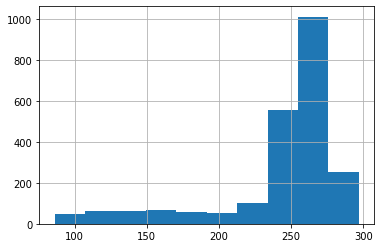

In [183]:
sentiment['totalTokens'].hist()

<Axes: >

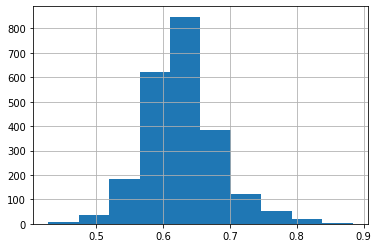

In [184]:
sentiment['lexicalDiversity'].hist()

<Axes: >

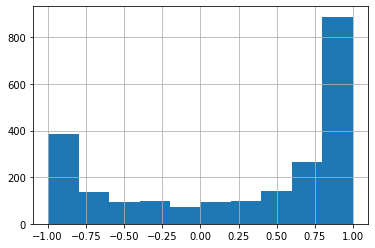

In [185]:
sentiment['scoreCompound'].hist()

In [186]:
sentiment.to_csv('20240405_PhD_SentimentLetters-Chunks.csv', index = True, encoding="utf-8")